# Ford GoBike Data Investigation & Visualization
## by ADELEKE ADEKOLA EMMANUEL


## Investigation Overview

In this investigation, I looked at how the duration of trips changes with respect to DateTime and customer type. The main focus was on hours of the day, days of the week and customer type.

## Dataset Overview

The dataset, 201902-fordgobike-tripdata.csv, is downloaded from Udacity classroom and licensed by Ford GoBike. This dataset includes 183,411 trips with 16 features such as locations, time, and user attributes. There are start and end stations. I noticed that most trips happen on the same stations, so I subset the dataset by choosing top 5 trips start stations with the most trips.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
fb_clean = pd.read_csv('fb_clean.csv')

### Data Wrangling
Here is a summary of my data cleaning process

Removed entries with missing values

Converted the time column to DateTime and extracted the hour, day, month and year columns
Converted each feature to the appropriate data type

# Univariate Analysis
# VISUALIZATION 1
### Let us consider the user type with the highest percentage with a pie chart.

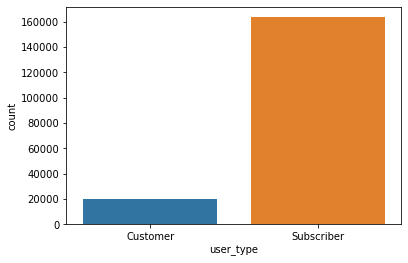

In [3]:
sb.countplot(data= fb_clean, x='user_type');

There are only two(2) types of users, Customer and Subscriber. And it also shows that there are more of Subscriber than Customer

# VISUALIZATION 2
### What gender has the highest riders?

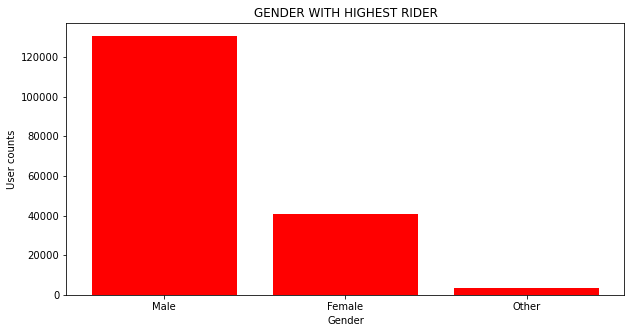

In [4]:
# showing the gender with the highest ride.
plt.figure(figsize=[10,5])
plt.title('GENDER WITH HIGHEST RIDER')
plt.bar(x = fb_clean.member_gender.value_counts().keys(), height = fb_clean.member_gender.value_counts(), color= 'red')
plt.xlabel('Gender')
plt.ylabel('User counts')
plt.show()

This shows the Male gender has the highest member count.

# VISUALIZATION 3
 ### How does the Datetime affect the ride?

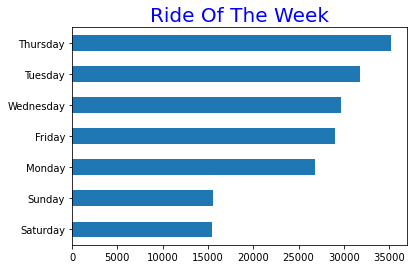

In [5]:
plt.title('Ride Of The Week', fontsize=20, color='blue')
fb_clean.start_day.value_counts(ascending=True).plot.barh();

This show Thursday has the highest day ride count and saturday has the lowest day ride count, and it also show the lowest riders are on the weekends.

# Visualization 4
# Bivariate Exploration
#### Lets start with looking at the correlation between trip duration and age.


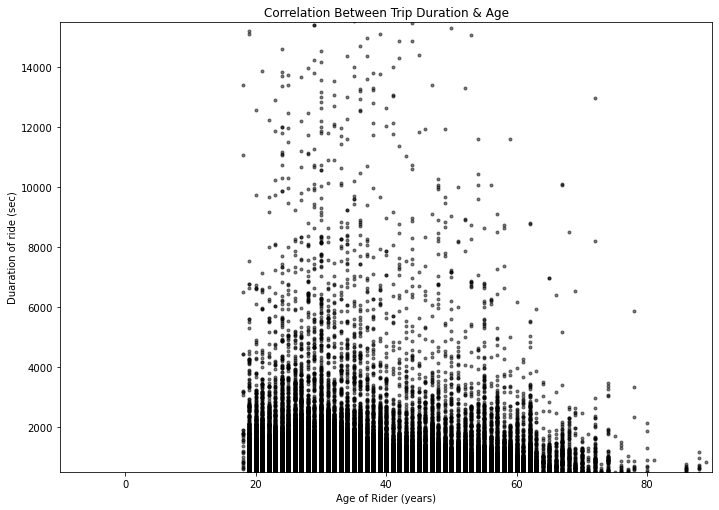

In [6]:
plt.figure(figsize=[11.69,8.27])
plt.scatter((2019 - fb_clean['member_birth_year']), fb_clean['duration_sec'], color = 'black', alpha = 0.50, marker = '.' )
plt.axis([-10, 90, 500, 15500])
plt.title('Correlation Between Trip Duration & Age')
plt.xlabel('Age of Rider (years)')
plt.ylabel('Duaration of ride (sec)')
plt.show()

From these we can say that most frequent users of bikes are between 20 and 60 years of age, and most of the durations are under 6000 and age is under 80

# VISUALIZATION 5
## MULTIVARIATE EXPLORATION
### How is the two categorical measures gender and user type play into the relationship between trip duration and age?

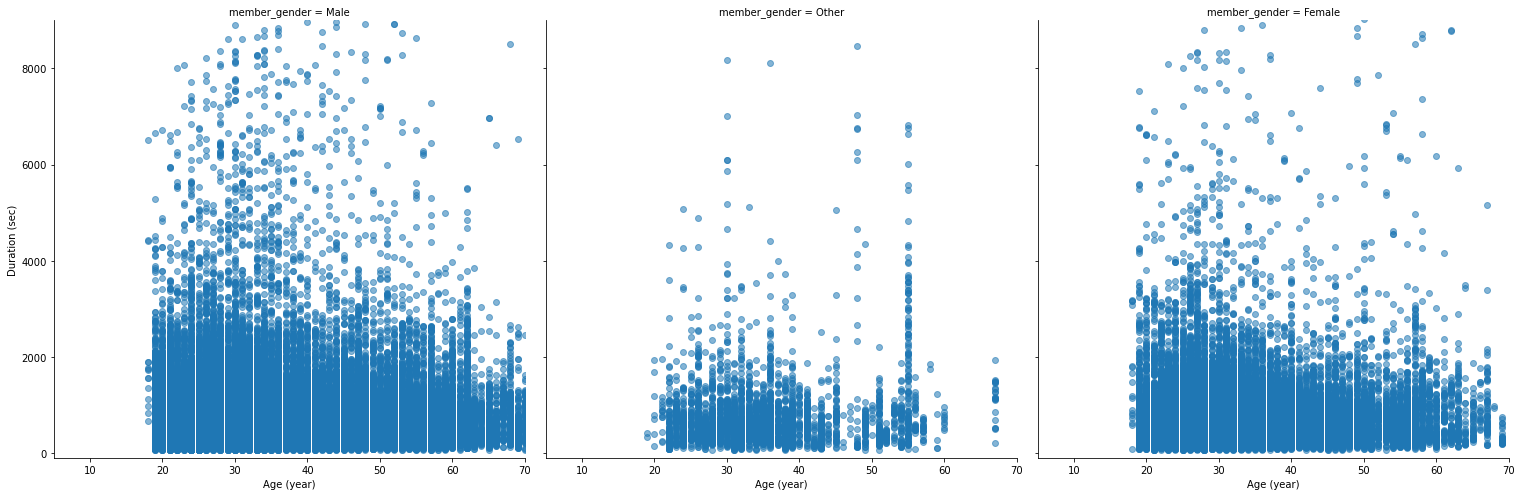

In [7]:
#let us separate the gender into different sub plots.
fb_clean['age'] = (2019 - fb_clean['member_birth_year'])
riders = sb.FacetGrid(data = fb_clean, col = 'member_gender', 
                      col_wrap = 4, size = 7,
                 xlim = [5, 70], ylim = [-100, 9000])
riders.map(plt.scatter, 'age', 'duration_sec', alpha=0.55)
riders.set_xlabels('Age (year)')
riders.set_ylabels('Duration (sec)')
warnings.simplefilter("ignore")
plt.show()

This shows rider of age 20 - 60 has more duration and We can see a jump in older age, close to 60 years of age

## Key Insights for Presentation

The type of user has an influence on the use of this service. There are quite a lot of differences;

>. Duration of use
Subscribers tends to have stable duration usage than Customers

>. Days of use
Subscribers tends to use the service in weekdays, in contrast Customers have more flexible time.

>. Hours of use
Subscribers have very intense usage at peak hour.

In [8]:
!jupyter nbconvert GoRide_Investigation_part_II.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook GoRide_Investigation_part_II.ipynb to slides
[NbConvertApp] Writing 902024 bytes to GoRide_Investigation_part_II.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Adekola\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Adekola\anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Adekola\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\Adekola\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\Adekola\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebo